In [ ]:
!pip install -q  pymatgen
!pip install -q  matminer
!pip install -q  mp_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.2/809.2 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.0/670.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import os

In [ ]:
df = pd.read_csv("clean_Li_battery_data.csv")

In [ ]:
df.head()

,battery_id,battery_formula,num_steps,max_voltage_step,framework,framework_formula,elements,nelements,chemsys,formula_anonymous,...,stability_charge,stability_discharge,id_charge,id_discharge,host_structure,adj_pairs,material_ids,entries_composition_summary,electrode_object,fields_not_requested
0,mp-757871_Li,Li2-4CoNi3O8,2,0.221134,"{'Co': 1.0, 'Ni': 3.0, 'O': 8.0}",CoNi3O8,"['Co', 'Ni', 'O']",3,Co-Ni-O,AB3C8,...,0.037008,0.010849,mp-1178027,mp-867640,"{'@module': 'pymatgen.core.structure', '@class...","[{'formula_charge': 'Li2CoNi3O8', 'formula_dis...","['mp-1178027', 'mp-757871', 'mp-867640']","{'all_formulas': ['Li4CoNi3O8', 'Li2CoNi3O8', ...",{'voltage_pairs': [{'voltage': 3.7556553933333...,"['battery_type', 'thermo_type']"
1,mp-755220_Li,Li3-4CrNi3O8,1,0.000000,"{'Cr': 1.0, 'Ni': 3.0, 'O': 8.0}",CrNi3O8,"['Cr', 'Ni', 'O']",3,Cr-Ni-O,AB3C8,...,0.089504,0.038122,mp-755220,mp-757137,"{'@module': 'pymatgen.core.structure', '@class...","[{'formula_charge': 'Li3CrNi3O8', 'formula_dis...","['mp-755220', 'mp-757137']","{'all_formulas': ['Li4CrNi3O8', 'Li3CrNi3O8'],...",{'voltage_pairs': [{'voltage': 3.5559580133333...,"['battery_type', 'thermo_type']"
2,mp-762224_Li,Li0-4Cu3Sb(PO4)4,1,0.000000,"{'Cu': 3.0, 'Sb': 1.0, 'P': 4.0, 'O': 16.0}",Cu3Sb(PO4)4,"['Cu', 'Sb', 'P', 'O']",4,Cu-O-P-Sb,AB3C4D16,...,0.067563,0.072026,mp-780043,mp-762224,"{'@module': 'pymatgen.core.structure', '@class...","[{'formula_charge': 'Cu3Sb(PO4)4', 'formula_di...","['mp-780043', 'mp-762224']","{'all_formulas': ['Li4Cu3Sb(PO4)4', 'Cu3Sb(PO4...",{'voltage_pairs': [{'voltage': 3.6375136033333...,"['battery_type', 'thermo_type']"
3,mp-759472_Li,Li1-2Cu(HO)4,1,0.000000,"{'Cu': 1.0, 'H': 4.0, 'O': 4.0}",Cu(HO)4,"['Cu', 'H', 'O']",3,Cu-H-O,AB4C4,...,0.078001,0.080676,mp-759472,mp-769242,"{'@module': 'pymatgen.core.structure', '@class...","[{'formula_charge': 'LiCu(HO)4', 'formula_disc...","['mp-759472', 'mp-769242']","{'all_formulas': ['Li2Cu(HO)4', 'LiCu(HO)4'], ...",{'voltage_pairs': [{'voltage': 2.9016335933333...,"['battery_type', 'thermo_type']"
4,mp-772496_Li,Li0-4Mn3CuNi2(PO4)6,1,0.000000,"{'Mn': 3.0, 'Cu': 1.0, 'Ni': 2.0, 'P': 6.0, 'O...",Mn3CuNi2(PO4)6,"['Mn', 'Cu', 'Ni', 'P', 'O']",5,Cu-Mn-Ni-O-P,AB2C3D6E24,...,0.045275,0.082965,mp-772496,mp-775323,"{'@module': 'pymatgen.core.structure', '@class...","[{'formula_charge': 'Mn3CuNi2(PO4)6', 'formula...","['mp-772496', 'mp-775323']","{'all_formulas': ['Mn3CuNi2(PO4)6', 'Li4Mn3CuN...",{'voltage_pairs': [{'voltage': 3.7576910933333...,"['battery_type', 'thermo_type']"


## matminerによる特徴量作成
#### 参考 : https://hackingmaterials.lbl.gov/matminer/featurizer_summary.html

#### 特徴量作成に必要な構造データの取得

In [ ]:
# API_KEYの設定
from google.colab import userdata
API_KEY = userdata.get('mp_API_KEY')

In [ ]:
# 充電時の材料のidのリストを作成
charge_material_ids = df["id_charge"].tolist()

In [ ]:
# 充電時の材料の特徴を取得
from mp_api.client import MPRester

with MPRester(API_KEY) as mpr:
    results = mpr.materials.summary.search(material_ids=charge_material_ids)

Retrieving SummaryDoc documents:   0%|          | 0/2430 [00:00<?, ?it/s]

In [ ]:
# 充電時のidと構造を持つデータフレームの作成
get_charge_data_list = []

for mat in results:
    data_dict = {
        'id_charge': mat.material_id,
        'structure': mat.structure
    }
    get_charge_data_list.append(data_dict)

charge_df = pd.DataFrame(get_charge_data_list)
charge_df

,id_charge,structure
0,mp-1178458,"[[ 1.92927471 10.55059045 0.24890602] Co, [1...."
1,mp-768618,"[[4.85678716 8.34203376 3.96629169] Li, [4.883..."
2,mp-774406,"[[2.93694741 0. 1.00176105] Cr, [7.380..."
3,mp-755075,"[[0. 0. 0.] Cr, [-1.2010675 -1.2210295 3.2205..."
4,mp-772720,"[[2.23734725 8.75574037 0. ] Cr, [6.712..."
...,...,...
2425,mp-1446045,"[[5.43303458 0.081511 1.4690322 ] V, [10.713..."
2426,mp-764115,"[[ 2.31630204 -1.80657833 2.90870546] V, [ 2...."
2427,mp-25288,"[[1.25000918 2.67932472 0.15336972] V, [3.7421..."
2428,mp-25207,"[[-4.96566558 3.07944553 3.11271978] V, [5.5..."


In [ ]:
# 元のデータフレームと結合
df = pd.merge(df, charge_df, on='id_charge')
df

,battery_id,battery_formula,num_steps,max_voltage_step,framework,framework_formula,elements,nelements,chemsys,formula_anonymous,...,stability_discharge,id_charge,id_discharge,host_structure,adj_pairs,material_ids,entries_composition_summary,electrode_object,fields_not_requested,structure
0,mp-757871_Li,Li2-4CoNi3O8,2,0.221134,"{'Co': 1.0, 'Ni': 3.0, 'O': 8.0}",CoNi3O8,"['Co', 'Ni', 'O']",3,Co-Ni-O,AB3C8,...,0.010849,mp-1178027,mp-867640,"{'@module': 'pymatgen.core.structure', '@class...","[{'formula_charge': 'Li2CoNi3O8', 'formula_dis...","['mp-1178027', 'mp-757871', 'mp-867640']","{'all_formulas': ['Li4CoNi3O8', 'Li2CoNi3O8', ...",{'voltage_pairs': [{'voltage': 3.7556553933333...,"['battery_type', 'thermo_type']","[[ 3.32668089 -0.42099245 -3.63344846] Li, [ 4..."
1,mp-755220_Li,Li3-4CrNi3O8,1,0.000000,"{'Cr': 1.0, 'Ni': 3.0, 'O': 8.0}",CrNi3O8,"['Cr', 'Ni', 'O']",3,Cr-Ni-O,AB3C8,...,0.038122,mp-755220,mp-757137,"{'@module': 'pymatgen.core.structure', '@class...","[{'formula_charge': 'Li3CrNi3O8', 'formula_dis...","['mp-755220', 'mp-757137']","{'all_formulas': ['Li4CrNi3O8', 'Li3CrNi3O8'],...",{'voltage_pairs': [{'voltage': 3.5559580133333...,"['battery_type', 'thermo_type']","[[-1.4408605 4.1931745 2.410986 ] Li, [1.440..."
2,mp-762224_Li,Li0-4Cu3Sb(PO4)4,1,0.000000,"{'Cu': 3.0, 'Sb': 1.0, 'P': 4.0, 'O': 16.0}",Cu3Sb(PO4)4,"['Cu', 'Sb', 'P', 'O']",4,Cu-O-P-Sb,AB3C4D16,...,0.072026,mp-780043,mp-762224,"{'@module': 'pymatgen.core.structure', '@class...","[{'formula_charge': 'Cu3Sb(PO4)4', 'formula_di...","['mp-780043', 'mp-762224']","{'all_formulas': ['Li4Cu3Sb(PO4)4', 'Cu3Sb(PO4...",{'voltage_pairs': [{'voltage': 3.6375136033333...,"['battery_type', 'thermo_type']","[[0.28188535 7.17221625 4.48375425] Cu, [2.074..."
3,mp-759472_Li,Li1-2Cu(HO)4,1,0.000000,"{'Cu': 1.0, 'H': 4.0, 'O': 4.0}",Cu(HO)4,"['Cu', 'H', 'O']",3,Cu-H-O,AB4C4,...,0.080676,mp-759472,mp-769242,"{'@module': 'pymatgen.core.structure', '@class...","[{'formula_charge': 'LiCu(HO)4', 'formula_disc...","['mp-759472', 'mp-769242']","{'all_formulas': ['Li2Cu(HO)4', 'LiCu(HO)4'], ...",{'voltage_pairs': [{'voltage': 2.9016335933333...,"['battery_type', 'thermo_type']","[[0.16664829 5.61834541 6.31789818] Li, [2.963..."
4,mp-772496_Li,Li0-4Mn3CuNi2(PO4)6,1,0.000000,"{'Mn': 3.0, 'Cu': 1.0, 'Ni': 2.0, 'P': 6.0, 'O...",Mn3CuNi2(PO4)6,"['Mn', 'Cu', 'Ni', 'P', 'O']",5,Cu-Mn-Ni-O-P,AB2C3D6E24,...,0.082965,mp-772496,mp-775323,"{'@module': 'pymatgen.core.structure', '@class...","[{'formula_charge': 'Mn3CuNi2(PO4)6', 'formula...","['mp-772496', 'mp-775323']","{'all_formulas': ['Mn3CuNi2(PO4)6', 'Li4Mn3CuN...",{'voltage_pairs': [{'voltage': 3.7576910933333...,"['battery_type', 'thermo_type']","[[2.73817656 0. 0.98175548] Mn, [6.929..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,mp-1235320_Li,Li0-0.12VO2,1,0.000000,"{'V': 1.0, 'O': 2.0}",VO2,"['V', 'O']",2,O-V,AB2,...,0.130874,mp-1446045,mp-1235320,"{'@module': 'pymatgen.core.structure', '@class...","[{'formula_charge': 'VO2', 'formula_discharge'...","['mp-1446045', 'mp-1235320', 'mp-1393040']","{'all_formulas': ['VO2', 'LiV8O16'], 'all_chem...",{'voltage_pairs': [{'voltage': 2.7833067433333...,"['battery_type', 'thermo_type']","[[5.43303458 0.081511 1.4690322 ] V, [10.713..."
2426,mp-760992_Li,Li0-2V3O7,1,0.000000,"{'V': 3.0, 'O': 7.0}",V3O7,"['V', 'O']",2,O-V,A3B7,...,0.067151,mp-764115,mp-772164,"{'@module': 'pymatgen.core.structure', '@class...","[{'formula_charge': 'V3O7', 'formula_discharge...","['mp-764115', 'mp-772164', 'mp-760992']","{'all_formulas': ['Li2V3O7', 'V3O7'], 'all_che...",{'voltage_pairs': [{'voltage': 3.2735610533333...,"['battery_type', 'thermo_type']","[[ 2.31630204 -1.80657833 2.90870546] V, [ 2...."
2427,mp-19408_Li,Li0-1V2O5,1,0.000000,"{'V': 2.0, 'O': 5.0}",V2O5,"['V', 'O']",2,O-V,A2B5,...,0.025422,mp-25288,mp-19408,"{'@module': 'pymatgen.core.structure', '@class...","[{'formula_charge': 'V2O5', 'formula_discharge...","['mp-25288', 'mp-19408']","{'all_fo

#### 特徴量生成

In [ ]:
# 特徴量生成器を定義
import pymatgen as mg
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers.composition import ElementProperty, Stoichiometry, ValenceOrbital, IonProperty
from matminer.featurizers.structure import (SiteStatsFingerprint, StructuralHeterogeneity,
                                            ChemicalOrdering, StructureComposition, MaximumPackingEfficiency)

featurizer = MultipleFeaturizer([
    SiteStatsFingerprint.from_preset("CoordinationNumber_ward-prb-2017"),
    StructuralHeterogeneity(),
    ChemicalOrdering(),
    MaximumPackingEfficiency(),
    SiteStatsFingerprint.from_preset("LocalPropertyDifference_ward-prb-2017"),
    StructureComposition(Stoichiometry()),
    # StructureComposition(ElementProperty.from_preset("magpie")),
    StructureComposition(ValenceOrbital(props=['frac'])),
    StructureComposition(IonProperty(fast=True))
])

In [ ]:
# 特徴量生成(3時間ほどかかる)
featurizer_df = featurizer.featurize_dataframe(df, col_id='structure', ignore_errors=True)

In [ ]:
# データの保存
featurizer_df.to_csv("Li_material_featurizer_matminer.csv", index=False)

In [ ]:
# データの読み込み
df = pd.read_csv("Li_material_featurizer_matminer.csv")

## データの前処理

In [ ]:
# データ数の確認
df.shape

(2430, 306)

In [ ]:
# 項目の確認
df.columns

Index(['Unnamed: 0', 'battery_id', 'battery_formula', 'num_steps',
       'max_voltage_step', 'framework', 'framework_formula', 'elements',
       'nelements', 'chemsys',
       ...
       'MagpieData mean SpaceGroupNumber',
       'MagpieData avg_dev SpaceGroupNumber',
       'MagpieData mode SpaceGroupNumber', 'frac s valence electrons',
       'frac p valence electrons', 'frac d valence electrons',
       'frac f valence electrons', 'compound possible', 'max ionic char',
       'avg ionic char'],
      dtype='object', length=306)

In [ ]:
# 欠損値の確認
df.isnull().sum().sum()

4699

In [ ]:
# 欠損値を含む行を削除
clean_df = df.dropna()
clean_df

,Unnamed: 0,battery_id,battery_formula,num_steps,max_voltage_step,framework,framework_formula,elements,nelements,chemsys,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char
0,0,mp-757871_Li,Li2-4CoNi3O8,2,0.221134,"{'Co': 1.0, 'Ni': 3.0, 'O': 8.0}",CoNi3O8,"['Co', 'Ni', 'O']",3,Co-Ni-O,...,101.642857,102.448980,12.0,0.292135,0.359551,0.348315,0.0,False,0.779730,0.144328
1,1,mp-755220_Li,Li3-4CrNi3O8,1,0.000000,"{'Cr': 1.0, 'Ni': 3.0, 'O': 8.0}",CrNi3O8,"['Cr', 'Ni', 'O']",3,Cr-Ni-O,...,112.466667,107.164444,12.0,0.298851,0.367816,0.333333,0.0,False,0.779730,0.159319
2,2,mp-762224_Li,Li0-4Cu3Sb(PO4)4,1,0.000000,"{'Cu': 3.0, 'Sb': 1.0, 'P': 4.0, 'O': 16.0}",Cu3Sb(PO4)4,"['Cu', 'Sb', 'P', 'O']",4,Cu-O-P-Sb,...,43.375000,55.625000,12.0,0.274390,0.481707,0.243902,0.0,False,0.447278,0.084341
3,3,mp-759472_Li,Li1-2Cu(HO)4,1,0.000000,"{'Cu': 1.0, 'H': 4.0, 'O': 4.0}",Cu(HO)4,"['Cu', 'H', 'O']",3,Cu-H-O,...,127.800000,92.640000,12.0,0.350000,0.400000,0.250000,0.0,False,0.779730,0.115369
4,4,mp-772496_Li,Li0-4Mn3CuNi2(PO4)6,1,0.000000,"{'Mn': 3.0, 'Cu': 1.0, 'Ni': 2.0, 'P': 6.0, 'O...",Mn3CuNi2(PO4)6,"['Mn', 'Cu', 'Ni', 'P', 'O']",5,Cu-Mn-Ni-O-P,...,45.166667,58.611111,12.0,0.314159,0.504425,0.181416,0.0,True,0.590585,0.095276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,2425,mp-1235320_Li,Li0-0.12VO2,1,0.000000,"{'V': 1.0, 'O': 2.0}",VO2,"['V', 'O']",2,O-V,...,84.333333,96.444444,12.0,0.352941,0.470588,0.176471,0.0,False,0.559139,0.124253
2426,2426,mp-760992_Li,Li0-2V3O7,1,0.000000,"{'V': 3.0, 'O': 7.0}",V3O7,"['V', 'O']",2,O-V,...,77.100000,91.140000,12.0,0.350877,0.491228,0.157895,0.0,False,0.559139,0.117419
2427,2427,mp-19408_Li,Li0-1V2O5,1,0.000000,"{'V': 2.0, 'O': 5.0}",V2O5,"['V', 'O']",2,O-V,...,74.000000,88.571429,12.0,0.350000,0.500000,0.150000,0.0,True,0.559139,0.114110
2428,2428,mp-25207_Li,Li0-0.67V2O5,2,0.641710,"{'V': 2.0, 'O': 5.0}",V2O5,"['V', 'O']",2,O-V,...,74.000000,88.571429,12.0,0.350000,0.500000,0.150000,0.0,True,0.559139,0.114110


In [ ]:
clean_df.columns

Index(['Unnamed: 0', 'battery_id', 'battery_formula', 'num_steps',
       'max_voltage_step', 'framework', 'framework_formula', 'elements',
       'nelements', 'chemsys',
       ...
       'MagpieData mean SpaceGroupNumber',
       'MagpieData avg_dev SpaceGroupNumber',
       'MagpieData mode SpaceGroupNumber', 'frac s valence electrons',
       'frac p valence electrons', 'frac d valence electrons',
       'frac f valence electrons', 'compound possible', 'max ionic char',
       'avg ionic char'],
      dtype='object', length=306)

In [ ]:
# indexの削除
clean_df = clean_df.drop("Unnamed: 0", axis=1)

In [ ]:
# idカラムを削除
id_list = clean_df.filter(like="id", axis=1).columns.to_list()

clean_df = clean_df.drop(id_list , axis=1)
clean_df

,battery_formula,num_steps,max_voltage_step,framework,framework_formula,elements,nelements,chemsys,formula_anonymous,formula_charge,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char
0,Li2-4CoNi3O8,2,0.221134,"{'Co': 1.0, 'Ni': 3.0, 'O': 8.0}",CoNi3O8,"['Co', 'Ni', 'O']",3,Co-Ni-O,AB3C8,Li2CoNi3O8,...,101.642857,102.448980,12.0,0.292135,0.359551,0.348315,0.0,False,0.779730,0.144328
1,Li3-4CrNi3O8,1,0.000000,"{'Cr': 1.0, 'Ni': 3.0, 'O': 8.0}",CrNi3O8,"['Cr', 'Ni', 'O']",3,Cr-Ni-O,AB3C8,Li3CrNi3O8,...,112.466667,107.164444,12.0,0.298851,0.367816,0.333333,0.0,False,0.779730,0.159319
2,Li0-4Cu3Sb(PO4)4,1,0.000000,"{'Cu': 3.0, 'Sb': 1.0, 'P': 4.0, 'O': 16.0}",Cu3Sb(PO4)4,"['Cu', 'Sb', 'P', 'O']",4,Cu-O-P-Sb,AB3C4D16,Cu3Sb(PO4)4,...,43.375000,55.625000,12.0,0.274390,0.481707,0.243902,0.0,False,0.447278,0.084341
3,Li1-2Cu(HO)4,1,0.000000,"{'Cu': 1.0, 'H': 4.0, 'O': 4.0}",Cu(HO)4,"['Cu', 'H', 'O']",3,Cu-H-O,AB4C4,LiCu(HO)4,...,127.800000,92.640000,12.0,0.350000,0.400000,0.250000,0.0,False,0.779730,0.115369
4,Li0-4Mn3CuNi2(PO4)6,1,0.000000,"{'Mn': 3.0, 'Cu': 1.0, 'Ni': 2.0, 'P': 6.0, 'O...",Mn3CuNi2(PO4)6,"['Mn', 'Cu', 'Ni', 'P', 'O']",5,Cu-Mn-Ni-O-P,AB2C3D6E24,Mn3CuNi2(PO4)6,...,45.166667,58.611111,12.0,0.314159,0.504425,0.181416,0.0,True,0.590585,0.095276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,Li0-0.12VO2,1,0.000000,"{'V': 1.0, 'O': 2.0}",VO2,"['V', 'O']",2,O-V,AB2,VO2,...,84.333333,96.444444,12.0,0.352941,0.470588,0.176471,0.0,False,0.559139,0.124253
2426,Li0-2V3O7,1,0.000000,"{'V': 3.0, 'O': 7.0}",V3O7,"['V', 'O']",2,O-V,A3B7,V3O7,...,77.100000,91.140000,12.0,0.350877,0.491228,0.157895,0.0,False,0.559139,0.117419
2427,Li0-1V2O5,1,0.000000,"{'V': 2.0, 'O': 5.0}",V2O5,"['V', 'O']",2,O-V,A2B5,V2O5,...,74.000000,88.571429,12.0,0.350000,0.500000,0.150000,0.0,True,0.559139,0.114110
2428,Li0-0.67V2O5,2,0.641710,"{'V': 2.0, 'O': 5.0}",V2O5,"['V', 'O']",2,O-V,A2B5,V2O5,...,74.000000,88.571429,12.0,0.350000,0.500000,0.150000,0.0,True,0.559139,0.114110


In [ ]:
# MagpieDataの項目が重複しているので削除
magpie_data_list = clean_df.filter(like="MagpieData", axis=1).columns.to_list()

clean_df = clean_df.drop(magpie_data_list , axis=1)
clean_df

,battery_formula,num_steps,max_voltage_step,framework,framework_formula,elements,nelements,chemsys,formula_anonymous,formula_charge,...,5-norm,7-norm,10-norm,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char
0,Li2-4CoNi3O8,2,0.221134,"{'Co': 1.0, 'Ni': 3.0, 'O': 8.0}",CoNi3O8,"['Co', 'Ni', 'O']",3,Co-Ni-O,AB3C8,Li2CoNi3O8,...,0.572388,0.571519,0.571432,0.292135,0.359551,0.348315,0.0,False,0.779730,0.144328
1,Li3-4CrNi3O8,1,0.000000,"{'Cr': 1.0, 'Ni': 3.0, 'O': 8.0}",CrNi3O8,"['Cr', 'Ni', 'O']",3,Cr-Ni-O,AB3C8,Li3CrNi3O8,...,0.534909,0.533492,0.533339,0.298851,0.367816,0.333333,0.0,False,0.779730,0.159319
2,Li0-4Cu3Sb(PO4)4,1,0.000000,"{'Cu': 3.0, 'Sb': 1.0, 'P': 4.0, 'O': 16.0}",Cu3Sb(PO4)4,"['Cu', 'Sb', 'P', 'O']",4,Cu-O-P-Sb,AB3C4D16,Cu3Sb(PO4)4,...,0.666828,0.666673,0.666667,0.274390,0.481707,0.243902,0.0,False,0.447278,0.084341
3,Li1-2Cu(HO)4,1,0.000000,"{'Cu': 1.0, 'H': 4.0, 'O': 4.0}",Cu(HO)4,"['Cu', 'H', 'O']",3,Cu-H-O,AB4C4,LiCu(HO)4,...,0.459569,0.441640,0.428709,0.350000,0.400000,0.250000,0.0,False,0.779730,0.115369
4,Li0-4Mn3CuNi2(PO4)6,1,0.000000,"{'Mn': 3.0, 'Cu': 1.0, 'Ni': 2.0, 'P': 6.0, 'O...",Mn3CuNi2(PO4)6,"['Mn', 'Cu', 'Ni', 'P', 'O']",5,Cu-Mn-Ni-O-P,AB2C3D6E24,Mn3CuNi2(PO4)6,...,0.666801,0.666673,0.666667,0.314159,0.504425,0.181416,0.0,True,0.590585,0.095276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,Li0-0.12VO2,1,0.000000,"{'V': 1.0, 'O': 2.0}",VO2,"['V', 'O']",2,O-V,AB2,VO2,...,0.670782,0.667408,0.666732,0.352941,0.470588,0.176471,0.0,False,0.559139,0.124253
2426,Li0-2V3O7,1,0.000000,"{'V': 3.0, 'O': 7.0}",V3O7,"['V', 'O']",2,O-V,A3B7,V3O7,...,0.702013,0.700265,0.700015,0.350877,0.491228,0.157895,0.0,False,0.559139,0.117419
2427,Li0-1V2O5,1,0.000000,"{'V': 2.0, 'O': 5.0}",V2O5,"['V', 'O']",2,O-V,A2B5,V2O5,...,0.715743,0.714453,0.714293,0.350000,0.500000,0.150000,0.0,True,0.559139,0.114110
2428,Li0-0.67V2O5,2,0.641710,"{'V': 2.0, 'O': 5.0}",V2O5,"['V', 'O']",2,O-V,A2B5,V2O5,...,0.715743,0.714453,0.714293,0.350000,0.500000,0.150000,0.0,True,0.559139,0.114110


In [ ]:
clean_df.columns

Index(['battery_formula', 'num_steps', 'max_voltage_step', 'framework',
       'framework_formula', 'elements', 'nelements', 'chemsys',
       'formula_anonymous', 'formula_charge',
       ...
       '5-norm', '7-norm', '10-norm', 'frac s valence electrons',
       'frac p valence electrons', 'frac d valence electrons',
       'frac f valence electrons', 'compound possible', 'max ionic char',
       'avg ionic char'],
      dtype='object', length=169)

In [ ]:
# データの保存
clean_df.to_csv("material_feature_df.csv", index=False)

## 相関分析

In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("material_feature_df.csv")

In [ ]:
num_df = df.select_dtypes(include=["float64", "int64"])

<Axes: >

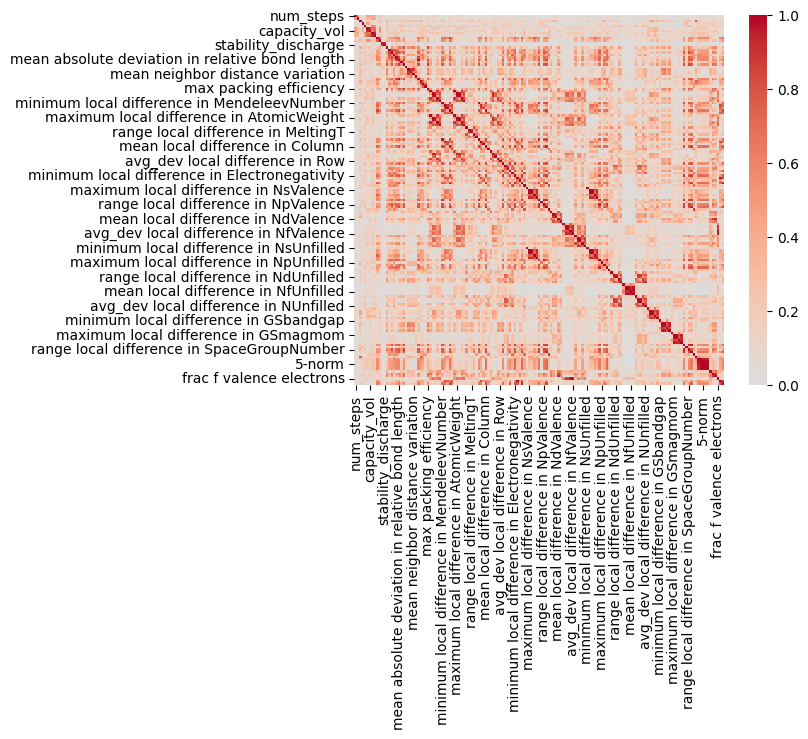

In [ ]:
# ヒートマップによる可視化
df_corr = num_df.corr().abs()
sns.heatmap(df_corr, vmax=1, vmin=0, fmt=".1f", center=0, square=True, cmap='coolwarm')

In [ ]:
# 90%以上の相関があるものは削除
upper_tri = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))


to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
to_drop += list(num_df.columns[num_df.isin([0]).sum() > 100])


num_df = num_df.drop(to_drop, axis=1)
num_df

,num_steps,nelements,max_delta_volume,average_voltage,capacity_grav,energy_grav,fracA_discharge,stability_charge,minimum CN_VoronoiNN,maximum CN_VoronoiNN,...,minimum local difference in GSvolume_pa,maximum local difference in GSvolume_pa,mean local difference in GSvolume_pa,minimum local difference in SpaceGroupNumber,maximum local difference in SpaceGroupNumber,avg_dev local difference in SpaceGroupNumber,0-norm,2-norm,frac s valence electrons,frac p valence electrons
0,2,3,0.008674,3.645088,137.171754,500.003153,0.250000,0.037008,5.999755,10.195544,...,1.140000,7.084399,2.644168,113.035858,212.940334,33.974522,4,0.630840,0.292135,0.359551
1,1,3,0.003674,3.555958,69.825436,248.296319,0.250000,0.089504,5.999351,8.565770,...,1.215000,6.936504,3.498748,156.870787,216.998680,22.156506,4,0.607362,0.298851,0.367816
2,1,4,0.078912,3.637514,148.887306,541.579600,0.142857,0.067563,4.363747,11.904116,...,1.966086,22.455000,6.001459,10.000000,213.100189,44.926378,4,0.699702,0.274390,0.481707
3,1,3,0.024693,2.901634,184.256618,534.645191,0.181818,0.078001,5.979264,9.364866,...,1.208721,7.730853,3.161494,77.542331,188.099741,37.717392,4,0.583095,0.350000,0.400000
4,1,5,0.071289,3.757691,113.645161,427.043409,0.100000,0.045275,4.070083,10.731594,...,1.214808,13.465238,4.284699,10.000000,212.979362,48.159064,5,0.695000,0.314159,0.504425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,1,2,0.022063,2.783307,39.974563,111.261470,0.040000,0.137107,5.984715,9.405782,...,1.271434,3.905000,2.155490,70.653291,217.000000,64.813276,2,0.745356,0.352941,0.470588
2389,1,2,0.091835,3.273561,192.330534,629.605747,0.166667,0.082159,4.937797,11.932746,...,0.499739,3.905000,1.985509,27.770406,217.000000,63.972552,2,0.761577,0.350877,0.491228
2390,1,2,0.052291,3.497992,141.941210,496.509149,0.125000,0.012942,5.289024,13.159879,...,0.701150,3.905000,1.941508,38.962735,217.000000,62.349029,2,0.769309,0.350000,0.500000
2391,2,2,0.015606,3.531304,95.801349,338.303650,0.086957,0.029818,5.461302,12.092674,...,0.537198,3.905000,1.944278,29.851992,217.000000,62.261096,2,0.769309,0.350000,0.500000


In [ ]:
to_drop

['capacity_vol',
 'energy_vol',
 'stability_discharge',
 'mean neighbor distance variation',
 'mean absolute deviation in relative cell size',
 'range local difference in Number',
 'range local difference in MendeleevNumber',
 'minimum local difference in AtomicWeight',
 'maximum local difference in AtomicWeight',
 'range local difference in AtomicWeight',
 'mean local difference in AtomicWeight',
 'avg_dev local difference in AtomicWeight',
 'range local difference in MeltingT',
 'minimum local difference in Column',
 'maximum local difference in Column',
 'mean local difference in Column',
 'maximum local difference in Row',
 'mean local difference in CovalentRadius',
 'mean local difference in Electronegativity',
 'range local difference in NsValence',
 'avg_dev local difference in NsValence',
 'minimum local difference in NpValence',
 'range local difference in NpValence',
 'mean local difference in NpValence',
 'range local difference in NdValence',
 'range local difference in NfV

In [ ]:
clean_df = df.drop(to_drop, axis=1)

<Axes: >

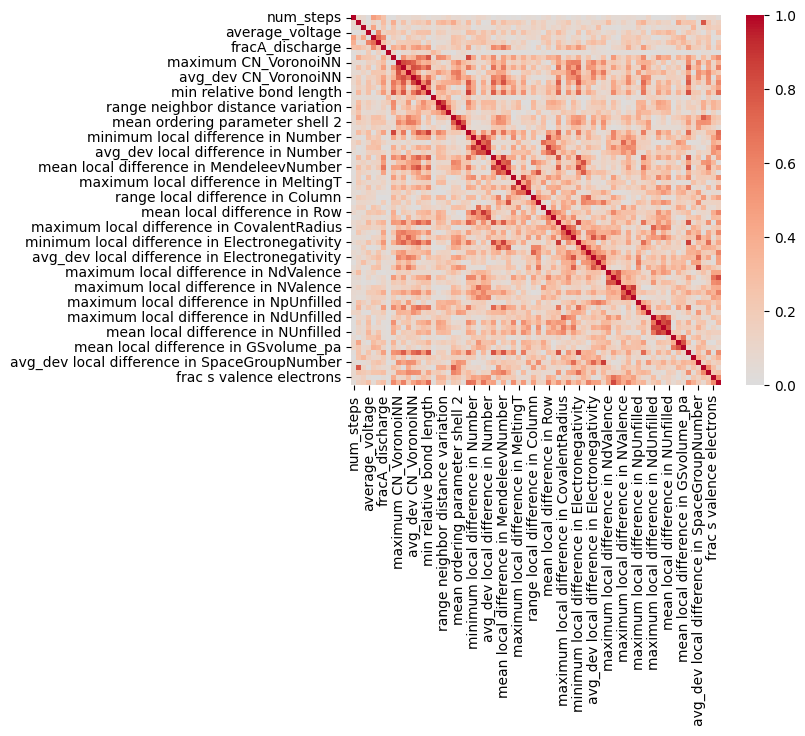

In [ ]:
# ヒートマップによる可視化
df_corr = num_df.corr().abs()
sns.heatmap(df_corr, vmax=1, vmin=0, fmt=".1f", center=0, square=True, cmap='coolwarm')

In [ ]:
# 同じ容量を表す指標であるenergy_gravを削除
learning_df = num_df.drop("energy_grav", axis=1)

In [ ]:
# 学習用データの保存
output ='learning_Li_battery_data.csv'
learning_df.to_csv(output, index=False)